In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel ("Downloads\Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Data Analysis 

In [4]:
df.shape

(5000, 14)

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# check missing data
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Observation:
    No missing values

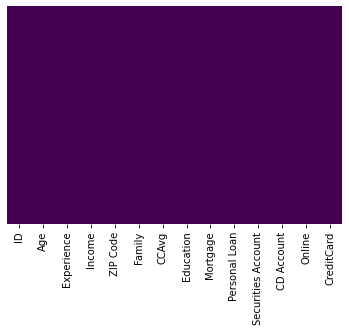

In [7]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
df.isnull().values.any()

False

In [10]:
# Number of unique values in dataset
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Dimensionality Reduction

Here we are going to drop the ID feature from the data set because it wont effect the final result.By droping these feature we can reduce our computational time and also it help in data compression.

In [11]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
df = df.drop(['ID'], axis=1)

In [13]:
df.head(1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


# Data Cleaning

In [14]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [15]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

52

In [16]:
# Here we relace the negative value with an absolute value
df["Experience"] = df["Experience"].apply(abs)


In [17]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

0

# Exploratory Data Visualization

I am not using ID column in tha pair plot as it is not relevent with our analysis. 

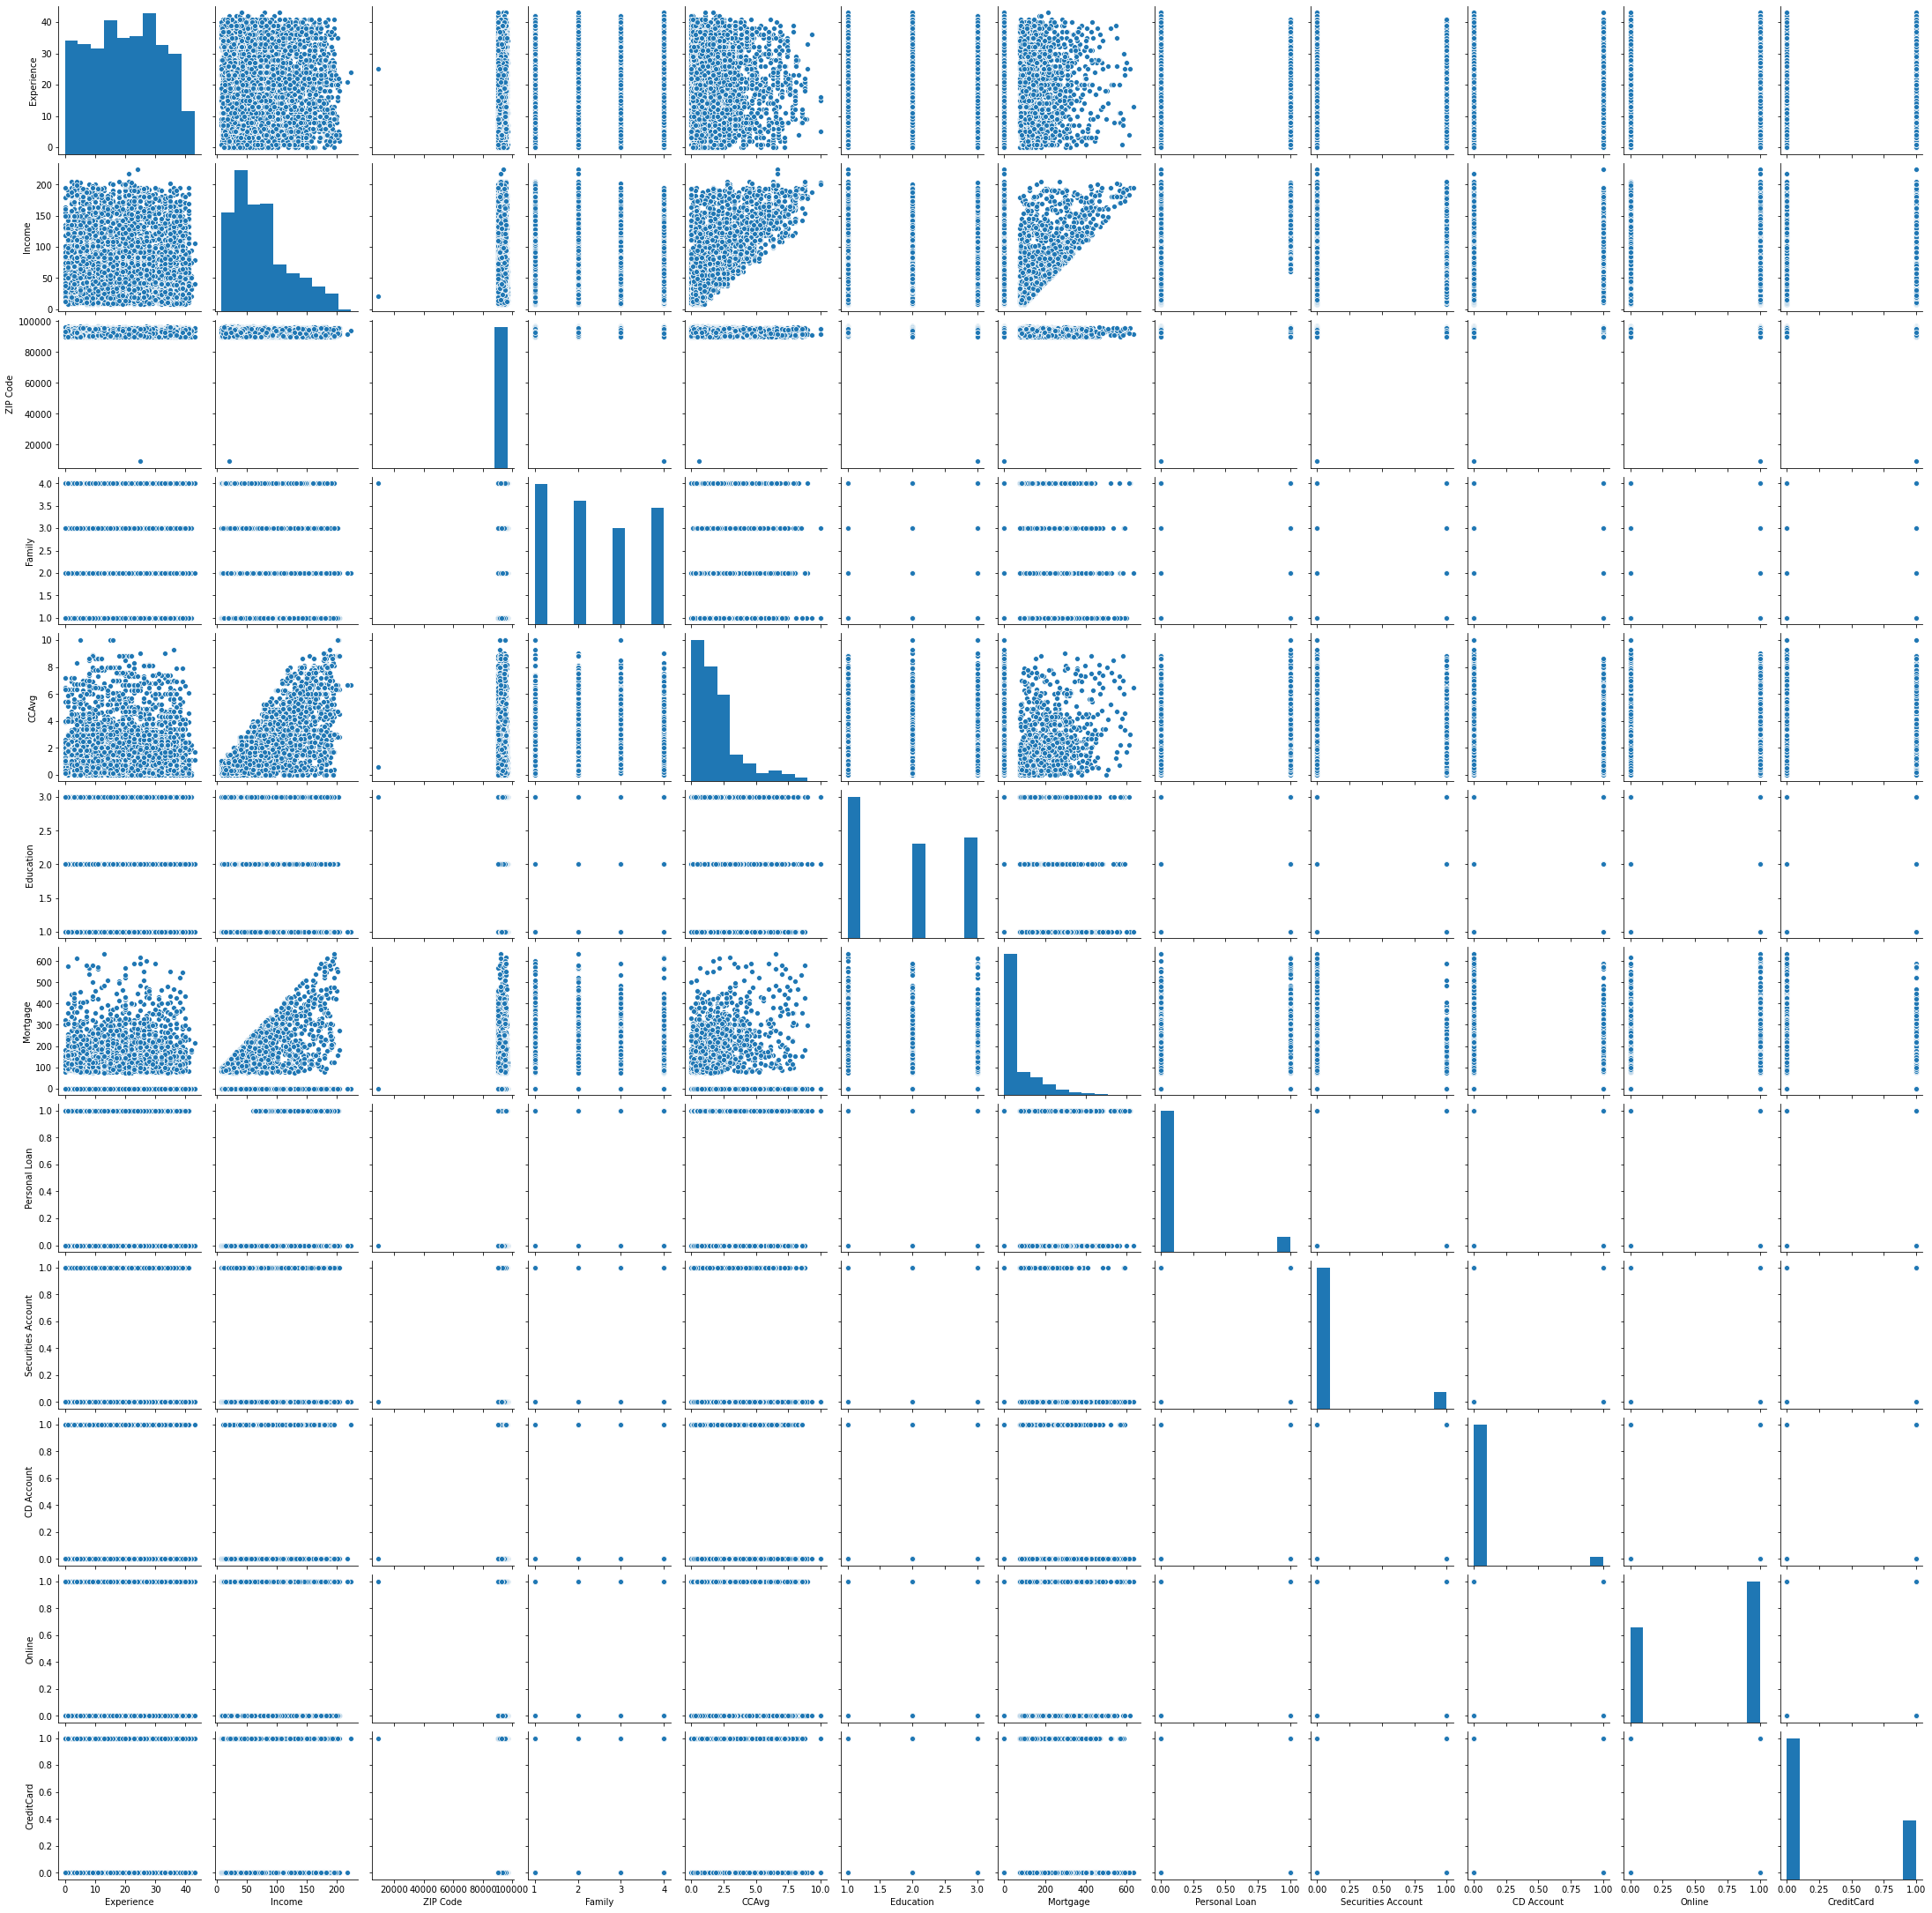

In [18]:
sns.pairplot(df.iloc[:,1:]) 

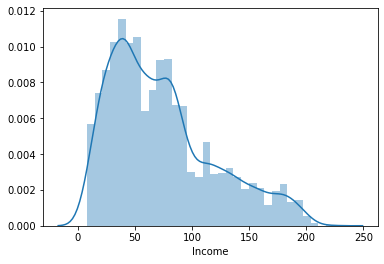

In [19]:
sns.distplot(df['Income'])

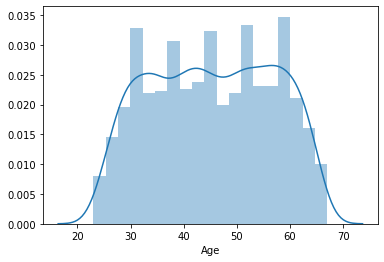

In [20]:
sns.distplot(df['Age'])

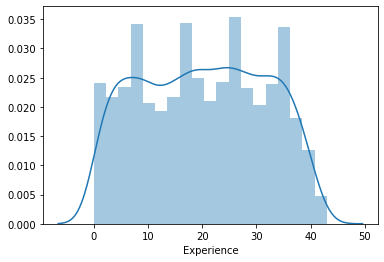

In [21]:
sns.distplot(df['Experience'])

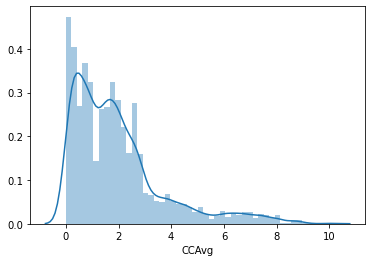

In [22]:
sns.distplot(df['CCAvg'])

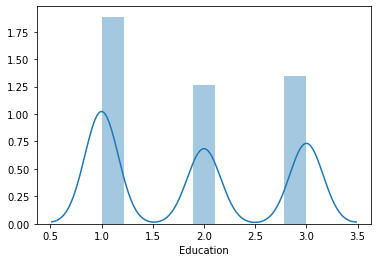

In [23]:
sns.distplot(df['Education'])

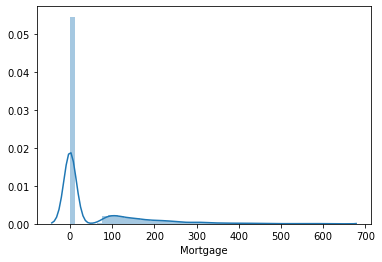

In [24]:
sns.distplot(df['Mortgage'])

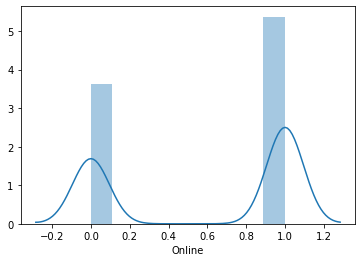

In [25]:
sns.distplot(df['Online'])

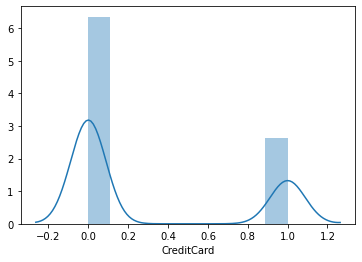

In [26]:
sns.distplot(df['CreditCard'])

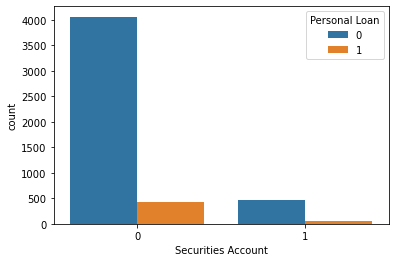

In [27]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

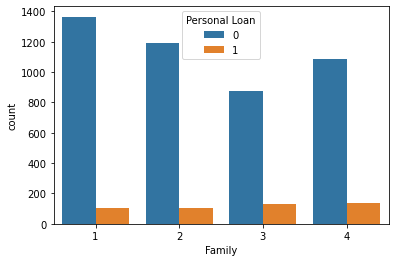

In [28]:
sns.countplot(x="Family", data=df,hue="Personal Loan")

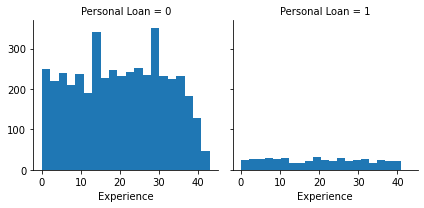

In [29]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'Experience', bins=20)

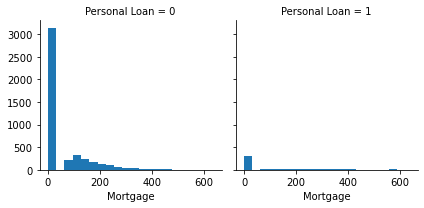

In [30]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'Mortgage', bins=20)

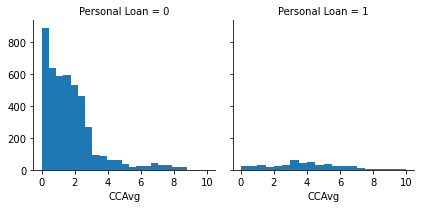

In [31]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'CCAvg', bins=20)

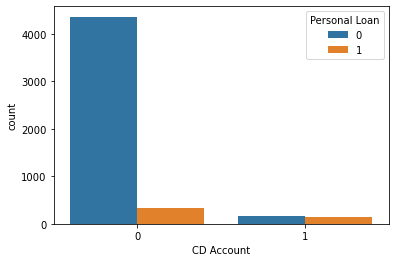

In [32]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

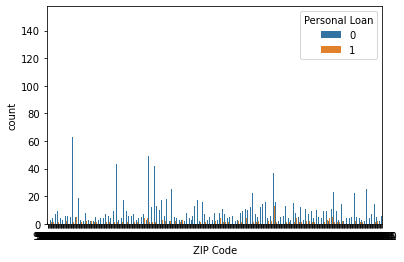

In [33]:
sns.countplot(x='ZIP Code',data=df,hue='Personal Loan')

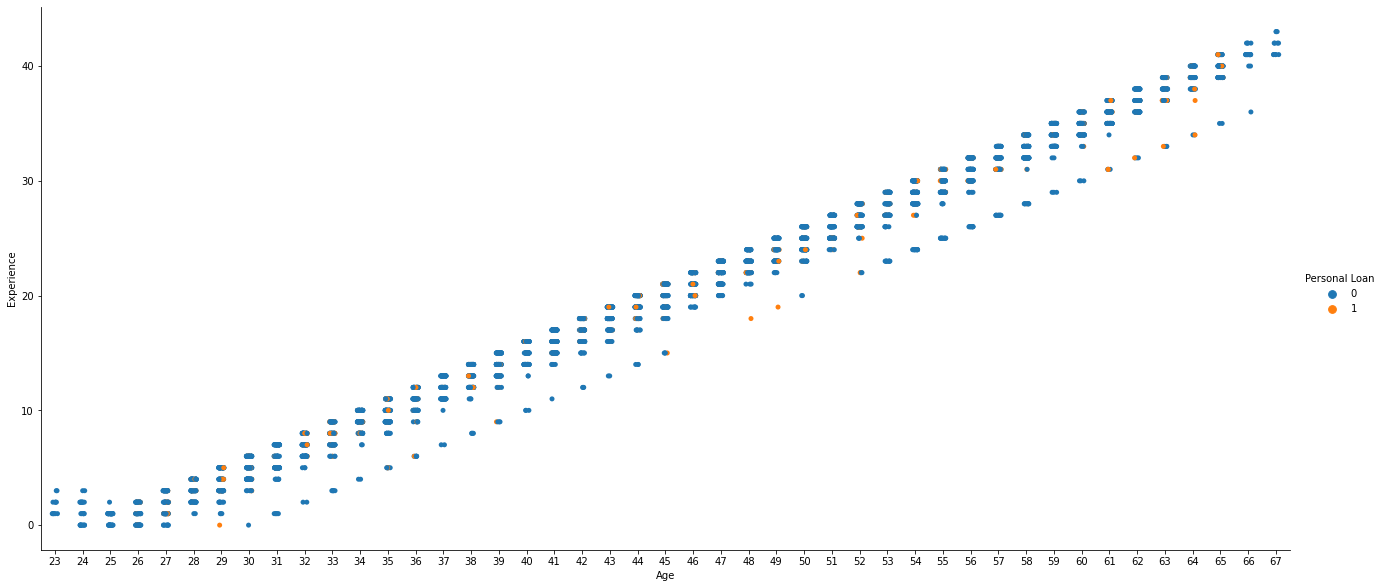

In [34]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

Observation:- Here we can clearly observe that as the age increases the Experience of an Employee or Person also increases. So we say that Experience is dependent on Age

c:\users\abhishek kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


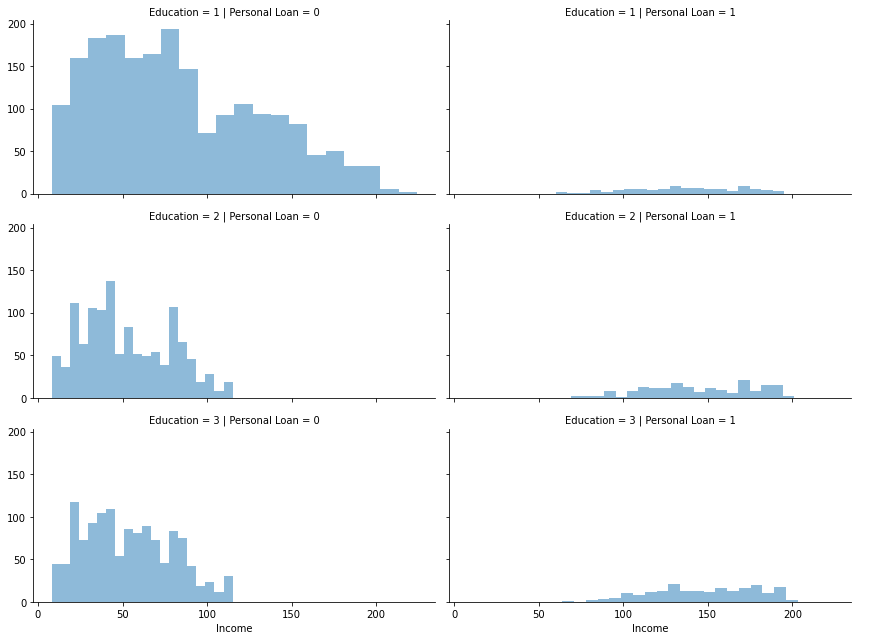

In [35]:
grid = sns.FacetGrid(df, col='Personal Loan', row='Education', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();


Observation:

1. The customer having income less than 100K annual income and undergraduates , their loans has been rejected mostly.

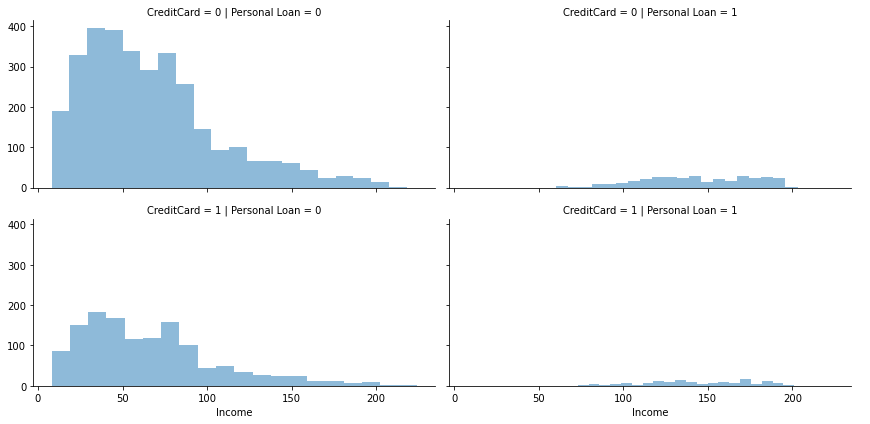

In [36]:
grid = sns.FacetGrid(df, col='Personal Loan', row='CreditCard', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

Observation: 1.Customer Having high income anf those does not have credit card,the loan offer acceptance rate is high.Many customer of bank doesnt have the Credit card

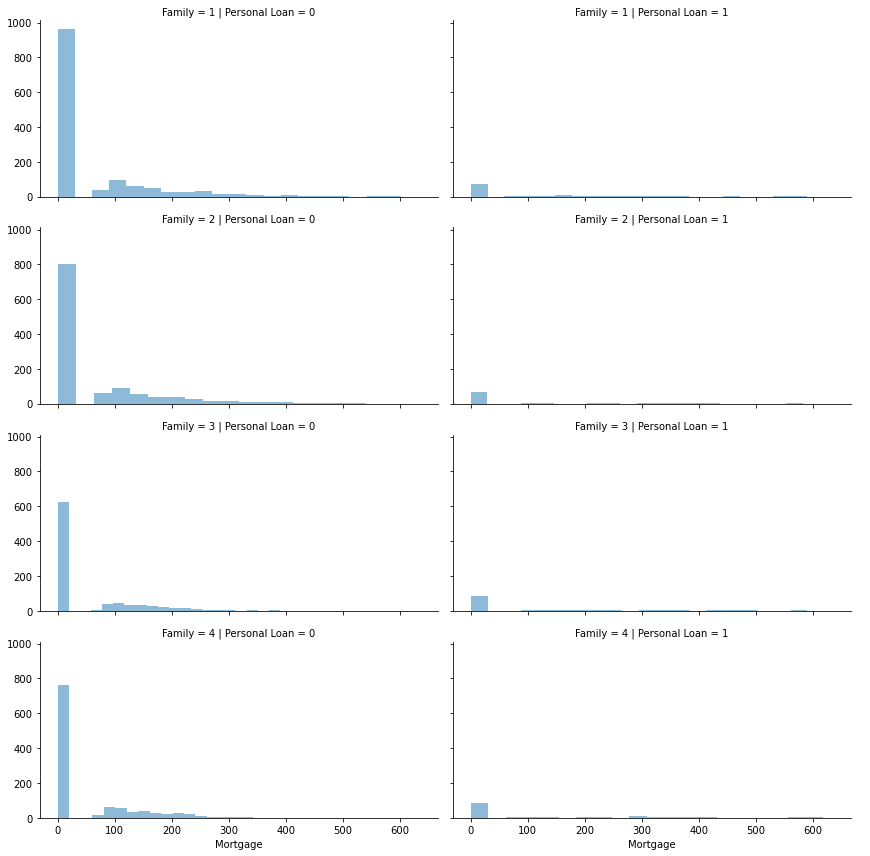

In [37]:
grid = sns.FacetGrid(df, col='Personal Loan', row='Family', size=3.0, aspect=2.0)
grid.map(plt.hist, 'Mortgage', alpha=.5, bins=20)
grid.add_legend();

Observation :-

Here in above diag. we observe that the person having personal loan has negligiable mortage but the person having having personal loan having the Mortage between 80k to 400k approx

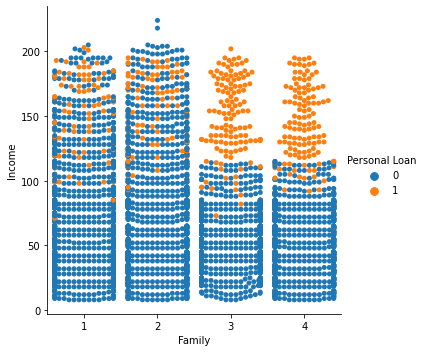

In [38]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

# Correlation using Heatmap :-

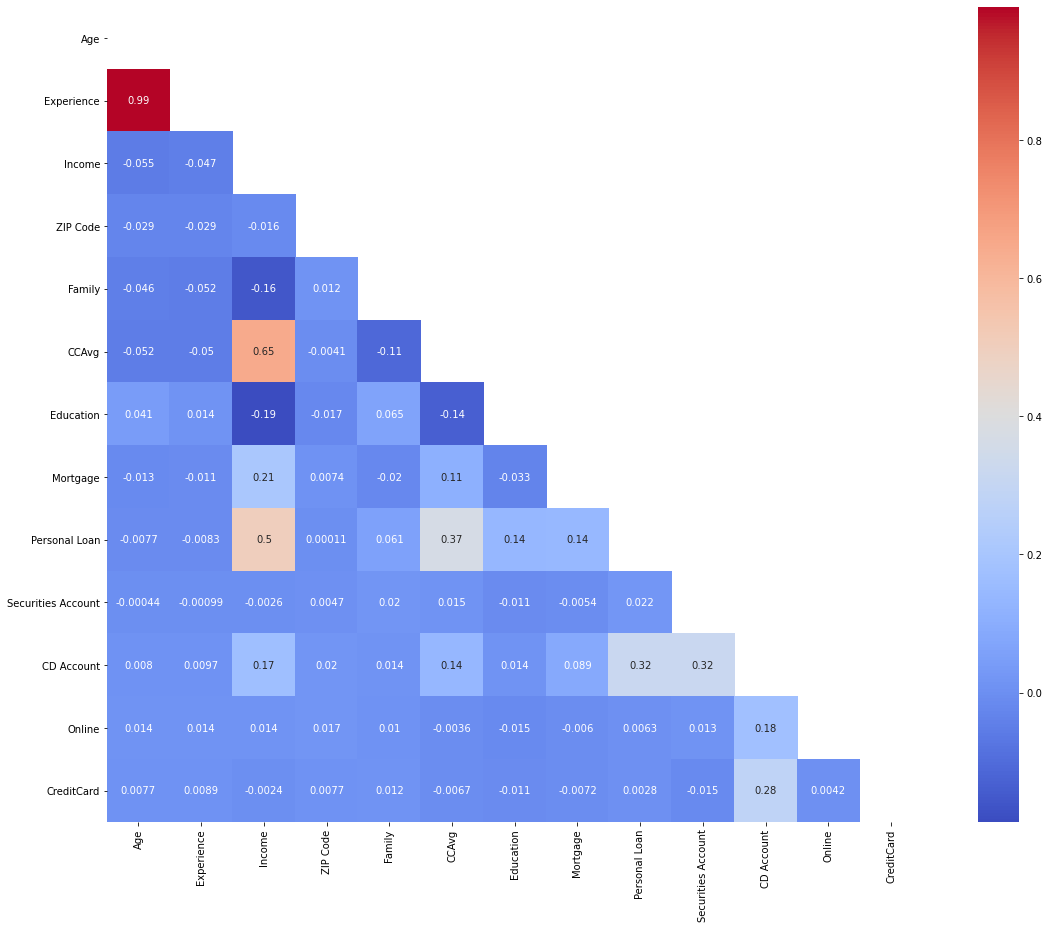

In [39]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask,annot=True,square=True,cmap="coolwarm")


# Feature Scaling:-

Feature Scaling is a technique to standardize the independent feature present in the data in fixed range.

In [40]:
scaler = StandardScaler();

colscal=['Age', 'Experience', 'Income', 'CCAvg']

scaler.fit(df[colscal])
scaled_df = pd.DataFrame(scaler.transform(df[colscal]),columns=colscal)

df =df.drop(colscal,axis=1)
df = scaled_df.join(df)

# Train_Test Data:-

In [41]:
X=df[['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard','ZIP Code']]
y=df["Personal Loan"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [43]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


# Models : 
   

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier(n_estimators=100)


In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
predict = rfc.predict(X_test.values)
predictProb = rfc.predict_proba(X_test.values)
acc_rfc=round(metrics.accuracy_score(predict,y_test)*100,2)


In [48]:
print('The accuracy of the dtree is',metrics.accuracy_score(predict,y_test))
print(".."*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print(".."*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print(".."*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))

The accuracy of the dtree is 0.9846666666666667
................................................................................
confusion_matrix :
 [[1351    3]
 [  20  126]]
................................................................................

classification_report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1354
           1       0.98      0.86      0.92       146

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

................................................................................
Recall Score 0.863013698630137
ROC AUC : 0.9974479472289108


# Support Vector Machine (SVM)

In [49]:
from sklearn import svm

In [50]:
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()
print(svc)

SVC()


In [51]:
## Fit
svc.fit(X_train,y_train)

## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

In [52]:
### Train data accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_predictions))
      
### Test data accuracy
print(accuracy_score(y_test,test_predictions))

0.9045714285714286
0.9026666666666666


# Observation:

From above models we observed the the Random forest gives the accuracy of 98.13% which is far better than SVM which gives the accuracy of 90.00% approx.

So we conclude that Random forest works better than SVM.